In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Exploratory Data Analysis

In [2]:
#data description
print(df.shape)
print(df.describe())
print(df.info())

(400, 5)
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), objec

In [3]:
#checking the types of gender
print("{}".format(df.Gender.value_counts()),end='\n\n')
#checking duplicates
print("Number of duplicates are {}".format(df.duplicated().sum()),end='\n\n')
#checking the number of null values
print(df.isna().sum())


Female    204
Male      196
Name: Gender, dtype: int64

Number of duplicates are 0

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


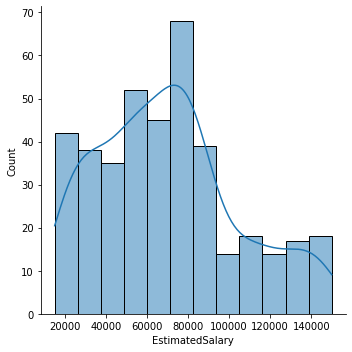

In [4]:

import seaborn as sns

sns.displot(df.EstimatedSalary,kind='hist',kde=True)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

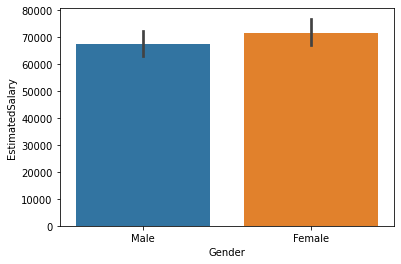

In [5]:
sns.barplot(x=df.Gender,y=df.EstimatedSalary)


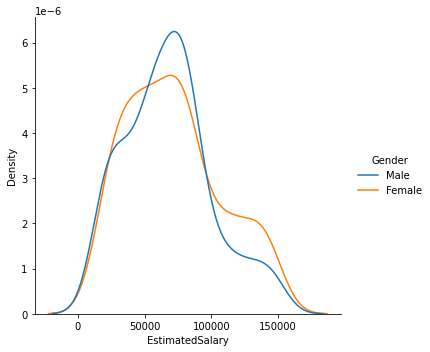

In [6]:
sns.displot(data=df, x="EstimatedSalary", hue="Gender", kind="kde")

In [7]:
df[df.Gender=='Female'].EstimatedSalary.describe()

count       204.000000
mean      71759.803922
std       35595.236189
min       15000.000000
25%       44000.000000
50%       70500.000000
75%       90750.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [8]:

df[df.Gender=='Male'].EstimatedSalary.describe()

count       196.000000
mean      67642.857143
std       32421.819181
min       15000.000000
25%       43000.000000
50%       68000.000000
75%       86000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

We can see that in the dataset there are slightly more more females than males with salary>100000,
also on an average the Females in this dataset seem to be earning more than men.
Also this can be explained due to MORE Females than Men, although the std.dev for men is lower which indicates slightly larger salary ranges and more females as well. REFER above graphs

View which gender purchases or did not purchase

In [9]:

pd.crosstab(df.Gender,df.Purchased)


Purchased,0,1
Gender,,
Female,127,77
Male,130,66


Male are more likely to purchase compare to Female's.

Analysis:
The entire analysis on the sample data states  that, women are earning little more than men here and their purchase count is higher too.
The salary is almost normally  distributed .

In [10]:
#creating dummies for One Hot Encoding
df1=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)

In [11]:
df1

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [12]:
 #No need for User Id and Purchased in X
x=df1.drop(columns=['User ID','Purchased'])
y=df1.Purchased

In [13]:
#Splitting the dat into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.3)

In [14]:
#Standerizing the data and creating a KNN model 
# Pipeline is used to process multiple steps together in this case both standerization and KNN estimator object creation is done at the same time.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
model_steps=[('Standerise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2))]# THis is basically euclidean metric

In [15]:
#Fitting the model
pipelineModel=Pipeline(steps=model_steps)
pipelineModel.fit(x_train,y_train)

Pipeline(steps=[('Standerise', StandardScaler()),
                ('shipModel', KNeighborsClassifier(n_neighbors=4))])

In [16]:
#Model score for train data
pipelineModel.score(x_train,y_train)

0.9142857142857143

In [17]:
#Model score on test data
pipelineModel.score(x_test,y_test)

0.9166666666666666

In [18]:
#Evaluating the model prediction
predic_test_y=pipelineModel.predict(x_test)
pd.crosstab(y_test,predic_test_y)

col_0,0,1
Purchased,,
0,76,7
1,3,34


<AxesSubplot:>

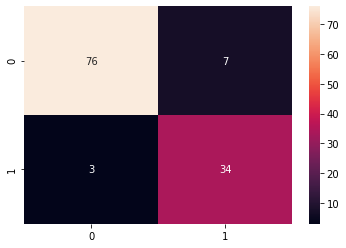

In [19]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,predic_test_y),annot=True)

In [20]:
#Model Evaluation 2
from sklearn.metrics import classification_report
print(classification_report(y_test,predic_test_y))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        83
           1       0.83      0.92      0.87        37

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



### Checking the best K value for our classification Model

In [21]:
import numpy as np
trainAccuracy=[]
testAccuracy=[]
errorRate=[]
for k in range(1,40):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    errorRate.append(np.mean(pred_i != y_test))

    trainAccuracy.append(model.score(x_train,y_train))
    testAccuracy.append(model.score(x_test,y_test))

In [22]:

subtracted = [element1 - element2 for (element1, element2) in zip( testAccuracy,trainAccuracy,)]

In [23]:
subtracted[1:]

[-0.06666666666666665,
 -0.059523809523809534,
 -0.01904761904761909,
 -0.014285714285714346,
 -0.013095238095238049,
 -0.0011904761904761862,
 0.01904761904761909,
 0.021428571428571352,
 0.030952380952380953,
 0.023809523809523836,
 0.021428571428571352,
 0.030952380952380953,
 0.03214285714285714,
 0.029761904761904767,
 0.0071428571428572285,
 0.017857142857142794,
 0.0071428571428572285,
 0.0011904761904761862,
 0.0035714285714286698,
 -0.010714285714285676,
 0.0035714285714286698,
 0.017857142857142794,
 0.013095238095238049,
 0.014285714285714235,
 0.02499999999999991,
 0.0357142857142857,
 0.040476190476190554,
 0.02499999999999991,
 0.040476190476190554,
 0.040476190476190554,
 0.03928571428571426,
 0.03928571428571426,
 0.042857142857142816,
 0.03928571428571426,
 0.02619047619047621,
 0.040476190476190554,
 0.04404761904761911,
 0.040476190476190554]

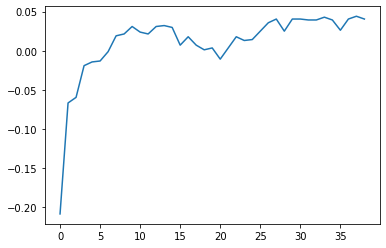

In [24]:
plt.plot(subtracted)

Minimum error:- 0.15 at K = 5


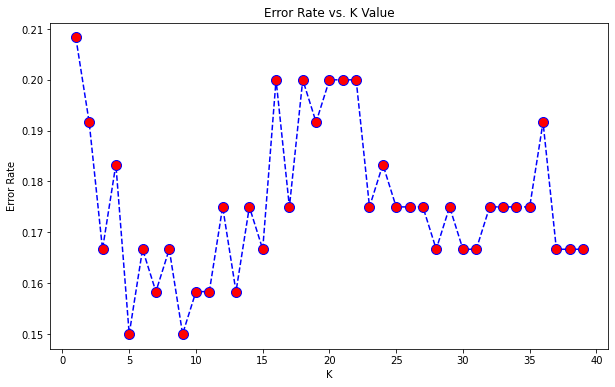

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),errorRate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(errorRate),"at K =",errorRate.index(min(errorRate))+1)

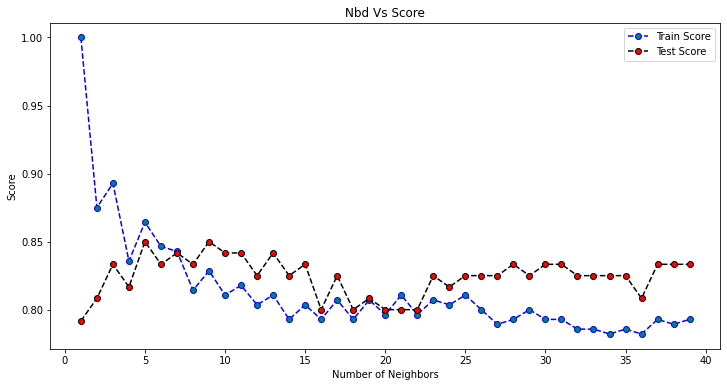

In [26]:
from matplotlib import pyplot as plt,style
plt.figure(figsize=(12,6))
plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

We can see the optimal value of K is 8 ! SInce for ither values the test-train difference is really 

In [27]:
#creating a model using K =5
model_steps_20=[('sipStanderise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2))]
pipelineModel=Pipeline(steps=model_steps_20)
pipelineModel.fit(x_train,y_train)
print("score is:"+ str(pipelineModel.score(x_train,y_train)))
print("********************************")
pipelineModel.score(x_test,y_test)
predic_test_y=pipelineModel.predict(x_train)
print(pd.crosstab(y_train,predic_test_y))

score is:0.9214285714285714
********************************
col_0        0   1
Purchased         
0          161  13
1            9  97


We can see that there is a little improvment in prediction after using the optimal valus of K. We infer 5 is the optimal value since it's errorRate is least and diff between Test and Train scores are lowest